一、绘制等高线图：
    np.meshgrid 得到笛卡尔积 的xy二维坐标值 并返回二个通道,x通道数据,y通道数据
    coutourf 不同高度面填充颜色
    coutour  不同高度面不填充颜色

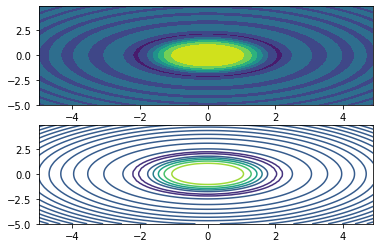

array([[-0.0052475 , -0.01939806, -0.01651205, ...,  0.00071954,
        -0.01651205, -0.01939806],
       [-0.01939806, -0.01626204,  0.00156902, ...,  0.01852793,
         0.00156902, -0.01626204],
       [-0.01651205,  0.00156902,  0.01875796, ...,  0.02020437,
         0.01875796,  0.00156902],
       ...,
       [ 0.00071954,  0.01852793,  0.02020437, ...,  0.00444585,
         0.02020437,  0.01852793],
       [-0.01651205,  0.00156902,  0.01875796, ...,  0.02020437,
         0.01875796,  0.00156902],
       [-0.01939806, -0.01626204,  0.00156902, ...,  0.01852793,
         0.00156902, -0.01626204]])

In [9]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2)
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y)  # 生成网格点的横坐标xx与纵坐标yy
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)  # 三维中的高度值
ax1.contourf(xx, yy, z) #不同高度面填充颜色
ax2.contour(xx, yy, z)  # 与contourf区别在于不同高度面不填充颜色
plt.show()

二、对于等高线图和网格点的理解：

等高线图实质上是三维图在二维平面上的映射，而网格点就是x,y轴所形成的平面上的点，由于z轴是基于二维上的，即指二维平面，而整个平面可以看成密密麻麻的网格点堆在一起形成的。

可通过np.meshgrid(x,y)函数生成网格点坐标，函数返回网格点的横坐标和纵坐标的两个数组

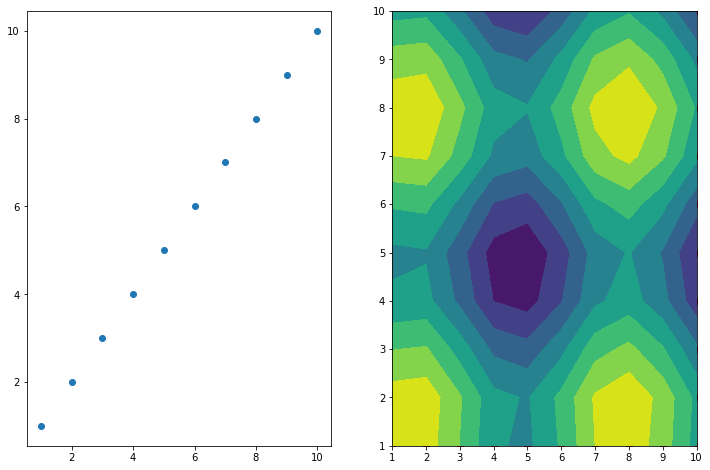

In [24]:


x = np.linspace(1,10,10)
y = np.linspace(1,10,10)

xx,yy = np.meshgrid(x, y)
zz = np.sin(xx)+np.sin(yy)#笛卡尔积
fig, ax = plt.subplots(figsize=(12,8),ncols=2,nrows=1)#该方法会返回画图对象  和坐标对象ax
ax[1].scatter(xx,yy,c= 'r')
ax[1].contourf(xx, yy, zz)

In [1]:
from sklearn import datasets
X, y = datasets.make_classification(n_samples=100, n_features=2,
                                    n_redundant=0, n_classes=2,
                                    random_state=7816)
X.shape, y.shape

((100, 2), (100,))

Text(0, 0.5, 'y values')

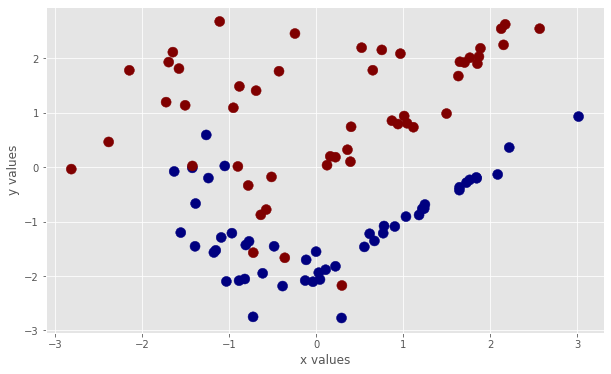

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.set_cmap('jet')
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.xlabel('x values')
plt.ylabel('y values')

In [3]:
import numpy as np
X = X.astype(np.float32)
y = y * 2 - 1
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train,X_test

(array([[-0.61702013, -1.9507395 ],
        [ 1.6450748 , -0.4222899 ],
        [ 1.7640094 , -0.23332804],
        [ 1.2486835 , -0.686556  ],
        [ 1.6334159 ,  1.6738582 ],
        [ 1.2183704 , -0.7669169 ],
        [ 0.16054986,  0.19849268],
        [-0.1278565 , -2.0840392 ],
        [ 0.12317213,  0.0359357 ],
        [-0.9709195 , -1.2135282 ],
        [-0.11676288, -1.703719  ],
        [ 0.0280838 , -1.9391911 ],
        [-0.81110406, -1.4310402 ],
        [ 0.22020994, -1.8222455 ],
        [ 2.1726243 ,  2.6239777 ],
        [ 0.66845876, -1.3559657 ],
        [-1.2406462 , -0.20070334],
        [ 1.6471438 , -0.36924782],
        [ 1.24068   , -0.76143456],
        [ 0.61339664, -1.2242023 ],
        [-1.0935117 , -1.2921417 ],
        [ 0.10722372, -1.8851807 ],
        [-1.4251138 ,  0.02189843],
        [ 1.8441168 , -0.20444912],
        [-1.11126   ,  2.6774619 ],
        [-0.78300637, -0.33697492],
        [-0.7272081 , -2.7513132 ],
        [ 1.1816319 , -0.879

0.8 0.0 (20, 1)
(333, 289) (96237, 2) (96237, 1)


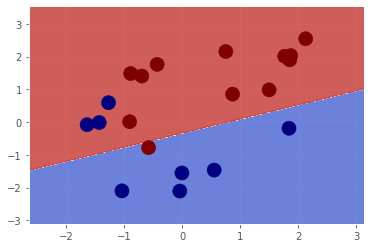

In [11]:
import cv2
svm = cv2.ml.SVM_create()
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.train(X_train, cv2.ml.ROW_SAMPLE, y_train)
_, y_pred = svm.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred),_,y_pred.shape)
def plot_decision_boundary(svm, X_test, y_test):
    # create a mesh to plot in
    h = 0.02  # step size in mesh
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    X_hypo = np.c_[xx.ravel().astype(np.float32),
                   yy.ravel().astype(np.float32)]
    _, zz = svm.predict(X_hypo)
    print(xx.shape,X_hypo.shape,zz.shape)
    zz = zz.reshape(xx.shape)

    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)

plot_decision_boundary(svm,X_test,y_test)